# Fourier Transformation

In this seminar, we will take a look at very simple one and two dimensional fourier transformations. You can find more information here:
 
 - http://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/
 - http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
-http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Signal_Processing_with_NumPy_Fourier_Transform_FFT_DFT.php

### 1D Fourier Transformation 

We will first create a list of data points X on which we will build a repeating function Y.

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
X = np.linspace(-100.,100.,10000)
print X.shape

(10000,)


In [3]:
Y = np.sin(3*X)

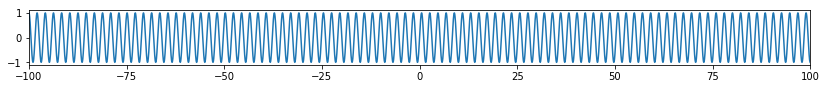

In [4]:
plt.figure(figsize = (14,1))
plt.plot(X,Y)
plt.xlim([X[0],X[-1]])
plt.show()

To perform a disctrete fourier transformation $\mathcal{F}:\mathbb{C}^N \rightarrow \mathbb{C}^N$, we can either use the fft module of numpy or scipy. fft denotes the discrete fourier transforamtion and ifft the inverse transformation.

In [5]:
from scipy.fftpack import fft, ifft

### $x_n = \frac{1}{N} \sum{^{N-1}_{k=0}}{X_k} e^{i2\pi kn /N} $

We can compute the real component of the fourier transformation of Y as follows

In [6]:
FY = fft(Y).real

The packing of the result is “standard”: If A = fft(a, n), then A[0] contains the zero-frequency term, A[1:n/2] contains the positive-frequency terms, and A[n/2:] contains the negative-frequency terms, in order of decreasingly negative frequency. So for an 8-point transform, the frequencies of the result are [0, 1, 2, 3, -4, -3, -2, -1]. To rearrange the fft output so that the zero-frequency component is centered, like [-4, -3, -2, -1, 0, 1, 2, 3], we use fftshift.

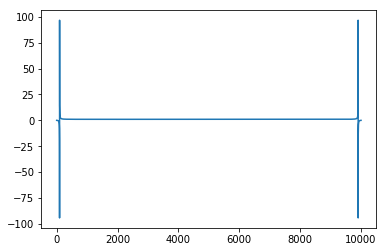

In [7]:
plt.plot(FY.real)
#plt.xlim([4000,6000])
plt.show()

Lets produce another function Y2, which is the sum of Y and another sin function. 

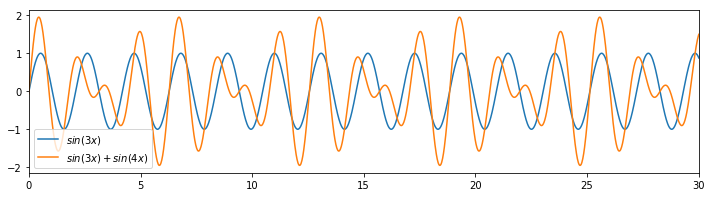

In [8]:
Y2 = Y+np.sin(4.*X)

plt.figure(figsize = (12,3))
plt.plot(X,Y, label = r"$sin(3x)$")
plt.plot(X,Y2, label = r"$sin(3x)+sin(4x)$")
plt.xlim([0,30])
plt.legend()
plt.show()

Next, we will compare the fourier transformation of Y and Y2.

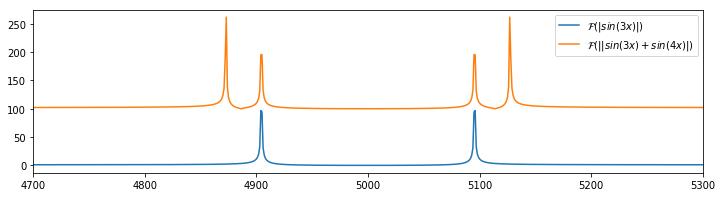

In [9]:
FY2= fft(Y2)
plt.figure(figsize = (12,3))
plt.plot(np.abs(np.fft.fftshift(FY).real), label = r"$\mathcal{F}(|sin(3x)|)$")
plt.plot(np.abs(np.fft.fftshift(FY2).real)+100, label = r"$\mathcal{F}(||sin(3x)+sin(4x)|)$")

plt.xlim([4700,5300])
plt.legend()
plt.show()

Next, we can try to remove the high frequency peak as follows, by setting all frequencys above a certain threshold to zero.

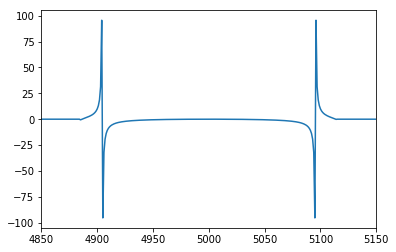

In [10]:
FY22 = np.fft.fftshift(FY2).real
FY22[5115:] = 0
FY22[:4885] = 0
plt.plot(FY22)
plt.xlim(4850,5150)
plt.show()


Following performe the inverse Fourier Transformation.

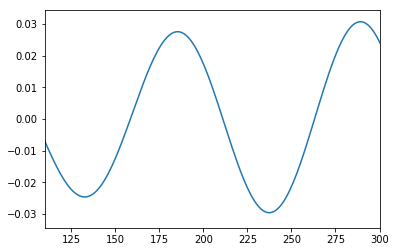

In [11]:
Y22 = np.fft.ifft(np.fft.fftshift(FY22)).real
plt.plot(Y22)
plt.xlim(110,300)
plt.show()

## 2D FFT

Following, we will apply a fourier transformation on two dimensional data. We will first span a homogeneous and symmetric grid using meshgrid. 

In [12]:
C   = np.linspace(-10,10,1000)
X,Y = np.meshgrid(C,C)

In [13]:
print X.shape
print Y.shape

(1000, 1000)
(1000, 1000)


Now we can build a 2D function.

In [14]:
def waves(X,Y):
    Z = np.sin(10.*X)+np.cos(10.*Y)
    return Z
Z = waves(X,Y)

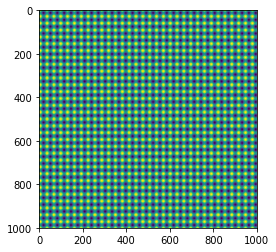

In [15]:
plt.imshow(Z)
plt.show()

We can plot the real part of the fourier plane.

In [16]:
FZ = np.fft.fftshift(np.fft.fft2(Z)).real

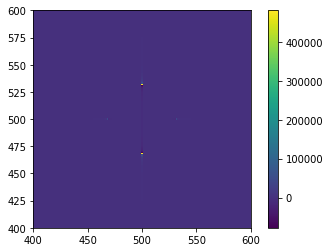

In [17]:
plt.imshow(FZ)
plt.colorbar()
plt.xlim([400,600])
plt.ylim([400,600])
plt.show()

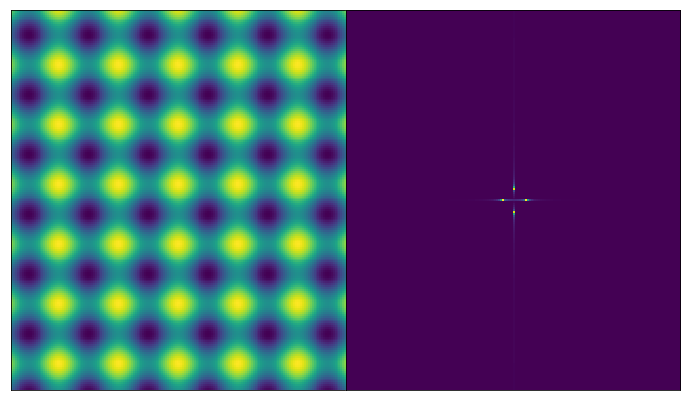

In [18]:
Z1 = Z[:200,:200]
FZ = np.abs(np.fft.fftshift(np.fft.fft2(Z1)))


def ssplot(im1,im2):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,7), 
                                   frameon = False,
                                   sharey = True)
    ax1.imshow(im1)
    ax2.imshow(im2)
    ax2.set_yticks(()),ax2.set_xticks(()),
    ax1.set_yticks(()),ax1.set_xticks(())
    fig.subplots_adjust(wspace=0)
    plt.show()
ssplot(Z1,FZ)

We can convolve the our wave function with another one with a different frequency.

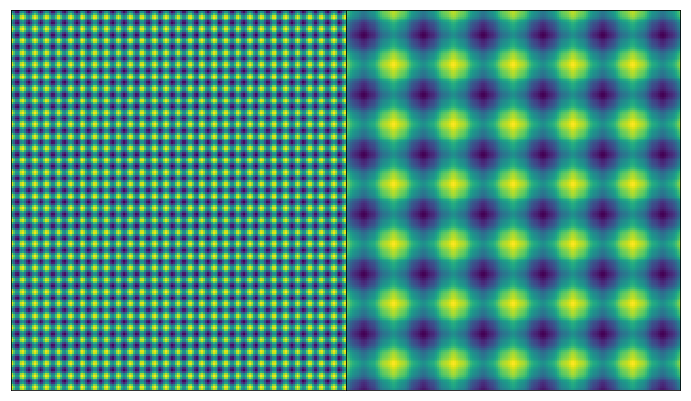

In [19]:
Noise     = (np.sin(50.*X[:200,:200])+np.cos(50.*Y[:200,:200]))*0.1
Z1Noise   = Z1+Noise
ssplot(Noise,Z1Noise)

We can take a look at the the individual Fourier components.

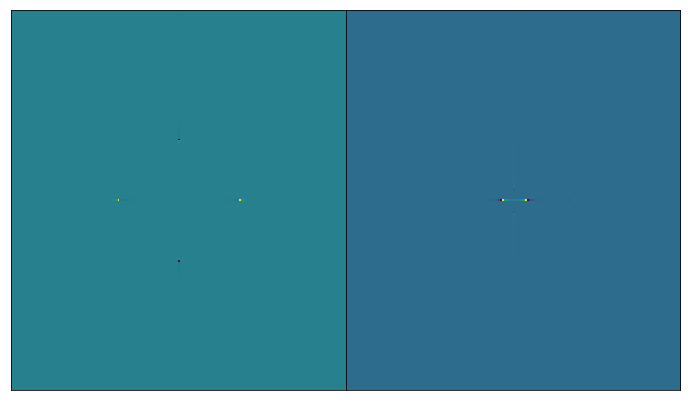

In [20]:
NoiseF     = np.fft.fftshift(np.fft.fft2(Noise))
Z1NoiseF   = np.fft.fftshift(np.fft.fft2(Z1Noise))
ssplot(NoiseF.real,Z1NoiseF.real)

Next, we can apply a mask and remove the low frequencies near the center, by setting the 20 smallest discret frequencyies to zero.

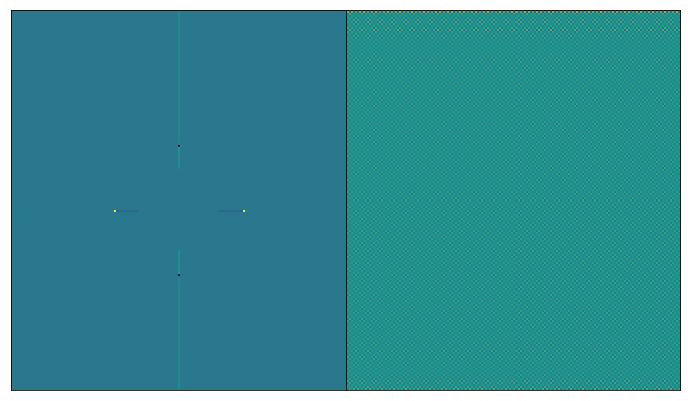

In [21]:
Z1NoiseFmask = Z1NoiseF.copy() ### creates a copy of the fourier transormed Z1, on which we will apply a mask.

half  = Z1NoiseFmask.shape[0]/2       ### defines the center coordinate of the symmetric data set Z1

Z1NoiseFmask[half-20:half+20,half-20:half+20] = 0 ### applies a rectangular shaped mask in the center with a = 2.

Z1NoiseFmaski= np.fft.ifft2(Z1NoiseFmask)    ### computes the inverse fourier transformation

ssplot(Z1NoiseFmask.real,Z1NoiseFmaski.real[:-10])

Let's take a look at the residual created with the masked fourier transformation.

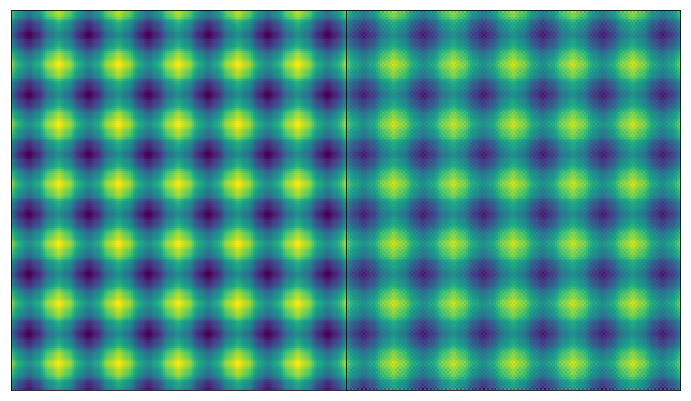

In [22]:
ssplot(Z1Noise,Z1Noise - Z1NoiseFmaski.real)

We can also produce a line profile of the individual images and compare them.

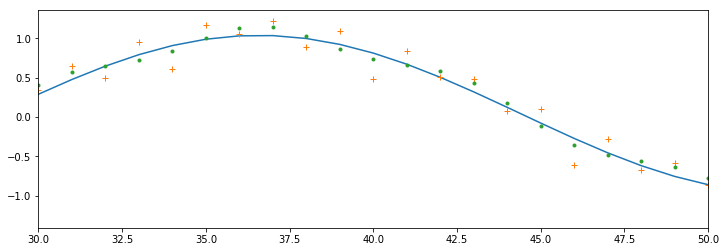

In [23]:
plt.figure(figsize = (12,4))
plt.plot(Z1[5])
plt.plot((Z1Noise - Z1NoiseFmaski.real)[5],"+")
plt.plot((Z1Noise)[5], ".")
plt.xlim([30,50])
plt.show()

Next, we can clip the high frequencies and compare the result to the initial image.

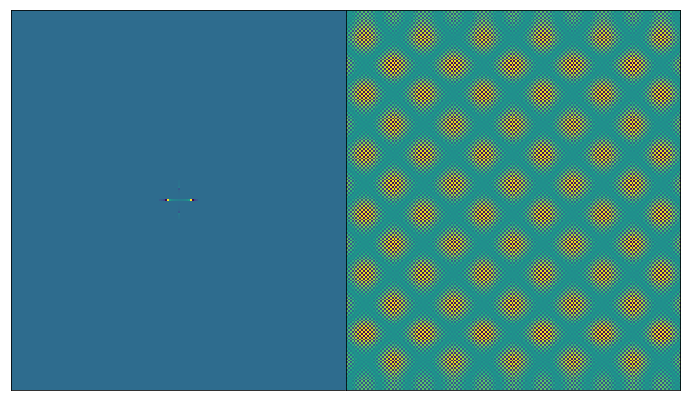

In [24]:
Z1NoiseFmask2 = Z1NoiseF.copy() ### creates a copy of the fourier transormed Z1, on which we will apply a mask.
half  = Z1NoiseFmask2.shape[0]/2 
a     = 10
Z1NoiseFmask2[:half-a] = 0
Z1NoiseFmask2[half+a:] = 0
Z1NoiseFmask2[:,:half-a] = 0
Z1NoiseFmask2[:,half+a:] = 0
Z1NoiseFmaski2= np.fft.ifft2(Z1NoiseFmask2) 
ssplot(Z1NoiseFmask2.real,Z1NoiseFmaski2.real)

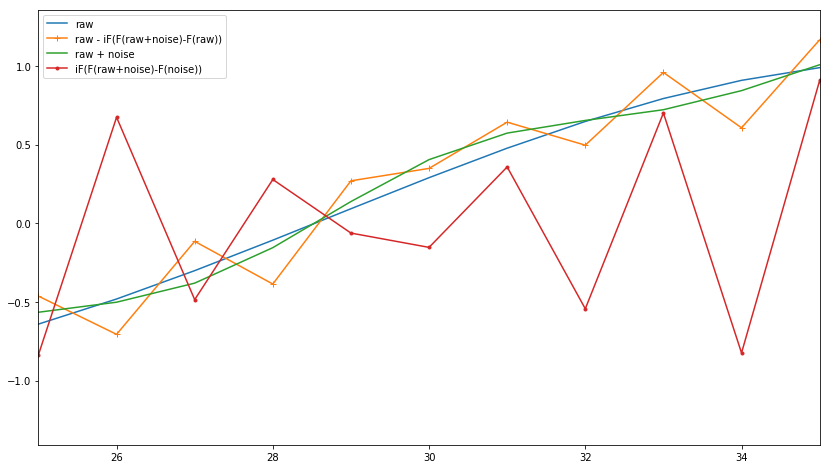

In [25]:
plt.figure(figsize = (14,8))
plt.plot(Z1[5], label = "raw")
plt.plot((Z1Noise - Z1NoiseFmaski.real)[5],"+-", label = "raw - iF(F(raw+noise)-F(raw))")
plt.plot(Z1Noise[5], label = "raw + noise")
plt.plot(Z1NoiseFmaski2.real[5],".-", label = "iF(F(raw+noise)-F(noise))")
plt.xlim([25,35])
plt.legend()
plt.show()